# RDkit homework

<strong>Author(s):</strong> Seth D. Veenbaas, Jessica A. Nash, The Molecular Sciences Software Institute

<div class="alert alert-block alert-info">
<h2>Objectives:</h2>

- Get the SMILES string of your favorite molecule.
- Draw a 2D structure and 3D model of your favorite molecule.
- Use `rdkit.chem.rdMolDescriptors` to calculate 4 molecular features. Include the following features:
    - molecular weight
    - fraction of SP<sub>3</sub> carbons


</div>

In [6]:
# Import modules from the rdkit library
import rdkit
from rdkit.Chem import Draw, AllChem, rdMolDescriptors, Descriptors3D
import py3Dmol

<div class="alert alert-block alert-warning">
<h3>Step 1</h3>

Determine the SMILES string for your favorite molecule (any complex molecule of your choice).

You can look up the SMILES strings on <a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a> or <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>

**Tip**: Use quotation marks around your SMILES string like this:
```python
acetic_acid_smiles = "CC(=O)O"
```
</div>

In [7]:
# Save the SMILES of your favorite molecule to a variable
Camptothecin_smiles = r'O=C\1N4\C(=C/C2=C/1COC(=O)[C@]2(O)CC)c3nc5c(cc3C4)cccc5'


<div class="alert alert-block alert-warning">
<h3>Step 2</h3>

Use RDKit to covert your SMILES string into a molecule called `favorite_molecule` and draw `favorite_molecule`.

Helpful methods:
- [`rdkit.Chem.MolFromSmiles()`](https://www.rdkit.org/docs/GettingStartedInPython.html#reading-single-molecules)
- [`Chem.Draw.MolToImage()`](https://www.rdkit.org/docs/GettingStartedInPython.html#reading-single-molecules)
</div>

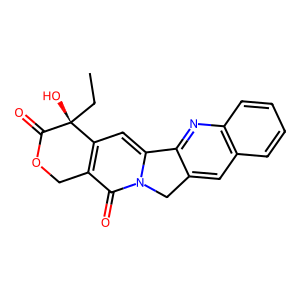

In [8]:
# Create an rdkit molecule and draw its structure
favorite_molecule = rdkit.Chem.MolFromSmiles(Camptothecin_smiles)
rdkit.Chem.Draw.MolToImage(favorite_molecule)

## 3D modeling

Run the cell below to interact with a 3D model of your favorite molecule.

Controls for the interactive py3Dmol window:

|  Action   |         Control         |
| :-------: | :---------------------: |
|  rotate   |  `left click` + `drag`  |
| translate | `center click` + `drag` |
|   zoom    | `right click` + `drag`  |

In [9]:
# Add Hydrogen atoms to molecule
favorite_molecule = AllChem.AddHs(favorite_molecule)

# Create a 3D molecule
AllChem.EmbedMolecule(favorite_molecule)

# Minimize energy of molecular conformation
AllChem.MMFFOptimizeMolecule(favorite_molecule)

# Open RDKit molecule in an interactive py3Dmol window
py3Dmol.view(
    data=rdkit.Chem.MolToMolBlock(favorite_molecule),
    style={"stick": {}, "sphere": {"scale": 0.3}}
)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div class="alert alert-block alert-warning">
<h3>Step 3</h3>

Calculate the molecular weight (using `CalcExactMolWt()`), fraction of SP<sub>3</sub> carbons (using `CalcFractionCSP3()`), and two other properties of your choice for your favorite molecule.

</div>

Here are some examples of descriptors that RDkit can calculate abridged from the [rdkit.Chem.rdMolDescriptors module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html):


## RDKit [`rdMolDescriptors`](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html) Methods

---

### `rdMolDescriptors.CalcExactMolWt()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate the exact molecular weight.  
- **onlyHeavy** : `bool`, *(default: `False`)*  
  If `True`, only the heavy atoms (non-hydrogen) are considered in the molecular weight calculation.  

**Returns**:  
- `float`  
  The exact molecular weight of the molecule.  

---

### `rdMolDescriptors.CalcFractionCSP3()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate the fraction of sp3 hybridized carbon atoms.  

**Returns**:  
- `float`  
  The fraction of carbon atoms that are sp3 hybridized in the molecule.  

---

### `rdMolDescriptors.CalcMolFormula()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate the molecular formula.  

**Returns**:  
- `str`  
  The molecular formula of the molecule.  

---

### `rdMolDescriptors.CalcNumAliphaticCarbocycles()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of aliphatic carbocycles.  

**Returns**:  
- `int`  
  The number of aliphatic carbocycles in the molecule.  

---

### `rdMolDescriptors.CalcNumAliphaticHeterocycles()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of aliphatic heterocycles.  

**Returns**:  
- `int`  
  The number of aliphatic heterocycles in the molecule.  

---

### `rdMolDescriptors.CalcNumAromaticRings()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule for which to calculate the number of aromatic rings.  

**Returns**:  
- `int`  
  The number of aromatic rings in the molecule.  

---

### `rdMolDescriptors.CalcNumAtomStereoCenters()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of atomic stereocenters.  

**Returns**:  
- `int`  
  The total number of atomic stereocenters in the molecule.  

---

### `rdMolDescriptors.CalcNumHBA()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of hydrogen bond acceptors.  

**Returns**:  
- `int`  
  The number of hydrogen bond acceptors in the molecule.  

---

### `rdMolDescriptors.CalcNumHBD()`
**Parameters**:  
- **mol** : `Mol`  
  The input molecule to calculate the number of hydrogen bond donors.  

**Returns**:  
- `int`  
  The number of hydrogen bond donors in the molecule.  



In [5]:
# Calculate the ExactMolWt, FractionCSP3, and two other properties for your favorite molecule. Print the results.
molwt= rdMolDescriptors.CalcExactMolWt(mol=Camptothecin)
fractionsp3 = rdMolDescriptors.CalcFractionCSP3(mol=Camptothecin)
stereo_centers= rdMolDescriptors.CalcNumAtomStereoCenters(mol=Camptothecin)
num_ar_rings= rdMolDescriptors.CalcNumAromaticRings(mol=Camptothecin)

print('molwt:', molwt, 'Fraction sp3:', fractionsp3, 'Num of Stereo centers:', stereo_centers, 'Num of aromatic rings:', num_ar_rings)

molwt: 348.111006992 Fraction sp3: 0.25 Num of Stereo centers: 1 Num of aromatic rings: 3
